In [1]:
packages <- c("ggplot2", "dplyr", "ggbreak", "lubridate", "grid", "fasttime", "pbkrtest", "ggpubr", "tidyr", "ggforce")
install.packages(packages)
lapply(packages, library, character.only = TRUE)

Installing packages into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ggbreak v0.1.1

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




[[1]]
[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[6]]
 [1] "fasttime"  "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"  
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[7]]
 [1] "pbkrtest"  "lme4"      "Matrix"    "fasttime"  "grid"      "lubridate"
 [7] "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[8]]
 [1] "ggpubr"    "pbkrtest"  "lme4"      "Matrix"    "fasttime"  "grid"     
 [7] "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[9]]
 [1] "tidyr"     "ggpubr"    "pbkrtest"  "lme4"      "Matrix"    "fasttime" 
 [7] "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"   "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[10]]
 [1] "ggforce"   "tidyr"     "ggpubr"    "pbkrtest"  "lme4"      "Matrix"   
 [7] "fasttime"  "grid"      "lubridate" "ggbreak"   "dplyr"     "ggplot2"  
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"

In [4]:
metrics_path <- "data/processed/metrics.csv"
df <- read.csv(metrics_path, row.names=1) %>%
    mutate(timestamp = fastPOSIXct(timestamp)) %>%
    mutate(service = recode(service, "inference-ai-panoptes" = "A", "inference-ai-simonides" = "B", "inference-ai-mnemosyne" = "C"))

df$service <- factor(df$service, c("C", "B", "A"))

## Resource usage comparison between models

The end time is the date at which the maximum scale of model A was set to 5. We stop our analysis at this date

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


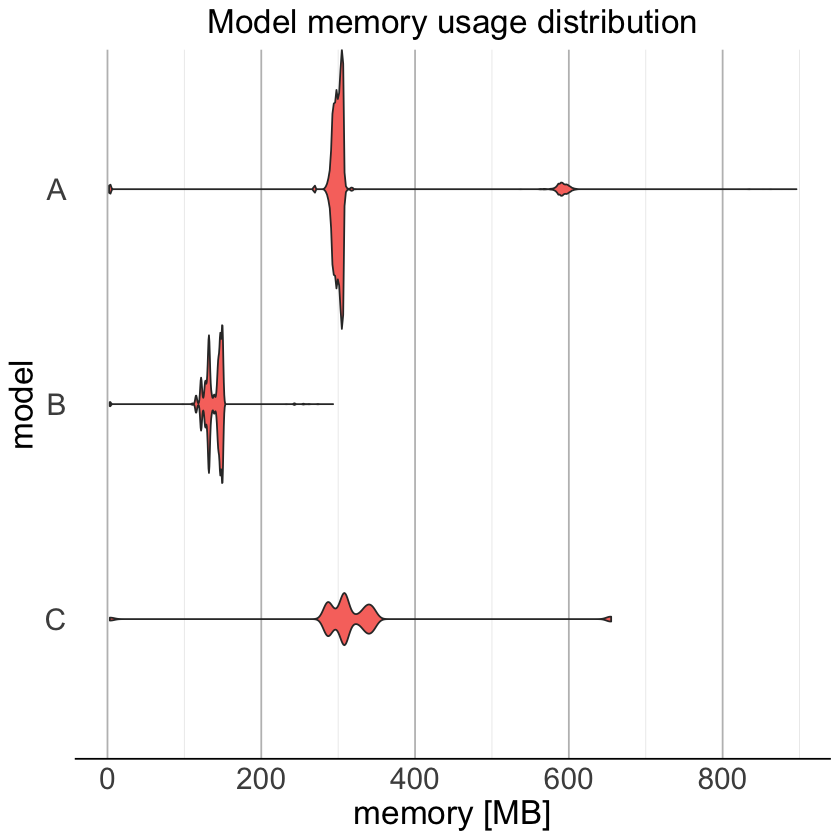

In [5]:
end_time <- fastPOSIXct("2023-04-13")

p1 <- df %>%
    filter(service %in% c("A", "B", "C")) %>%
    filter(timestamp < end_time) %>%
    mutate(mem = container_memory_working_set_bytes) %>%
    filter(mem > 0) %>%
    ggplot(aes(x=mem, y=service, fill="")) +
        geom_violin(width=1.3) +
        scale_x_continuous(breaks = seq(0, 1e+09, by = 2e+08), labels = seq(0, 1000, by = 200)) +
        xlab("memory [MB]") +
        ylab("model") +
        ggtitle("Model memory usage distribution") +
        theme_minimal() +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            panel.grid.major.y = element_blank(),
            panel.grid.major.x = element_line(color="grey"),
            plot.title = element_text(size = 20, hjust=0.5),
            legend.position = "none",
            legend.title = element_text(size=18),
            legend.text = element_text(size=18),
        )

p1

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


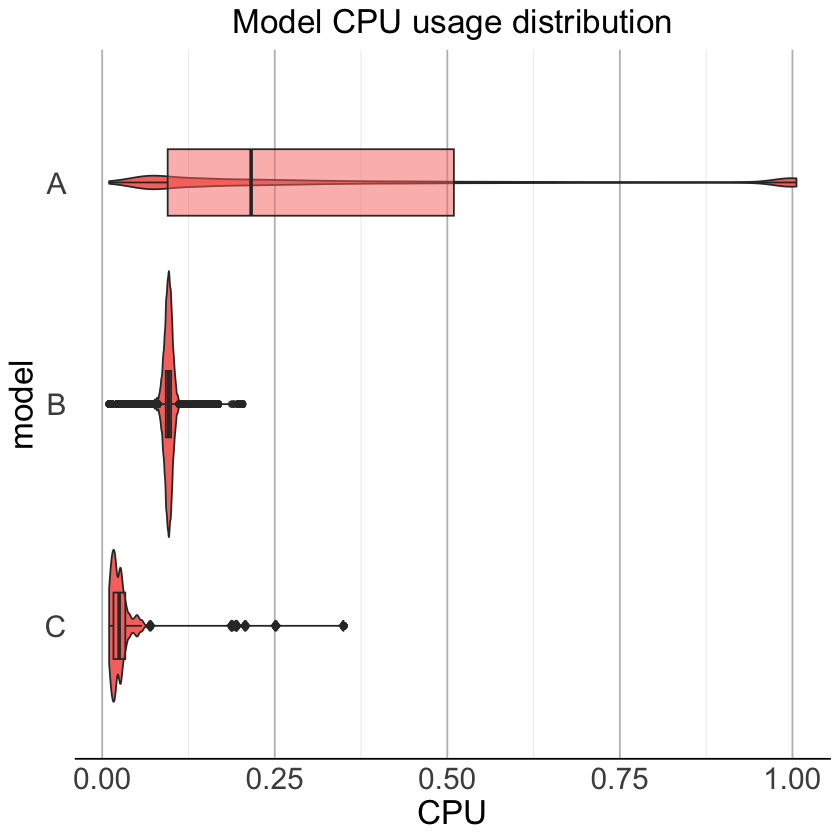

In [6]:
end_time <- fastPOSIXct("2023-04-13")

p2 <- df %>%
    filter(service %in% c("A", "B", "C")) %>%
    filter(timestamp < end_time) %>%
    mutate(cpu = node_namespace_pod_container.container_cpu_usage_seconds_total.sum_irate) %>%
    filter(cpu > 0.01) %>%
    ggplot(aes(x=cpu, y=service, fill="")) +
        geom_violin(width=1.2) +
        geom_boxplot(width=0.3, alpha=0.5) +
        xlab("CPU") +
        ylab("model") +
        ggtitle("Model CPU usage distribution") +
        theme_minimal() +
        theme(
            axis.text = element_text(size = 18),
            axis.title = element_text(size = 20),
            axis.line.x = element_line(color="black"),
            panel.grid.major.y = element_blank(),
            panel.grid.major.x = element_line(color="grey"),
            plot.title = element_text(size = 20, hjust=0.5),
            legend.position = "none",
            legend.title = element_text(size=18),
            legend.text = element_text(size=18),
        )

p2

Warning message:
“`position_dodge()` requires non-overlapping x intervals”
Warning message:
“`position_dodge()` requires non-overlapping x intervals”


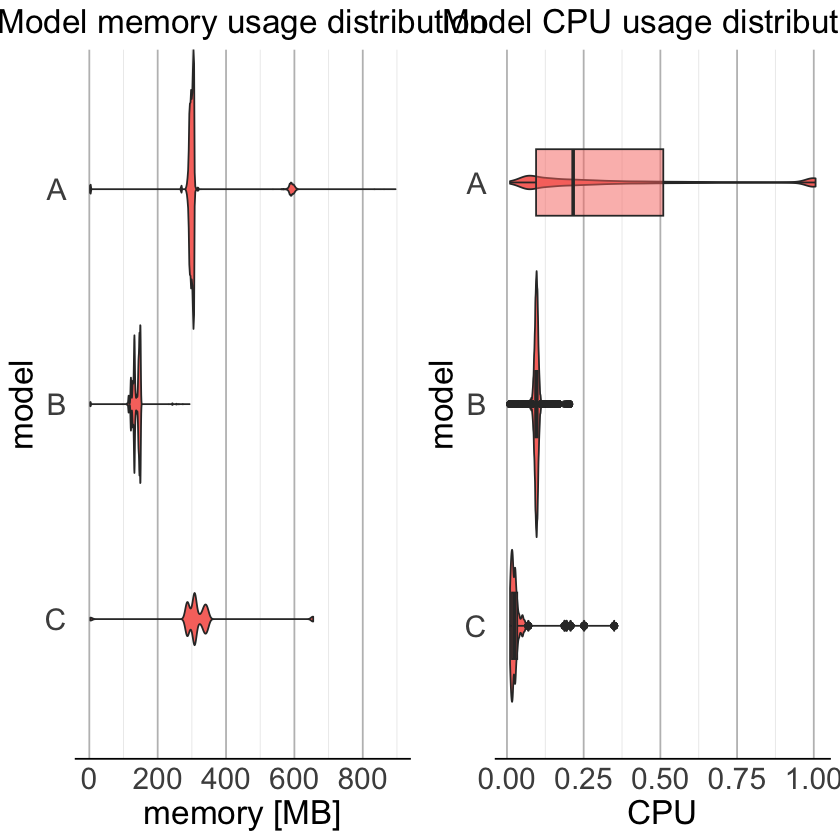

In [7]:
p <- ggarrange(p1, p2, nrow=1, ncol=2)
p

ggsave("output/memory-cpu-usage-comparison.pdf", width=13, height=4)